In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set(font_scale=2)

import missingno as msno
# 데이터셋에 널 데이터를 편하게 보여주는 라이브러리

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# EDA

In [3]:
df_train = pd.read_csv('../input/titanic/train.csv')
df_test = pd.read_csv('../input/titanic/test.csv')

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


<AxesSubplot:>

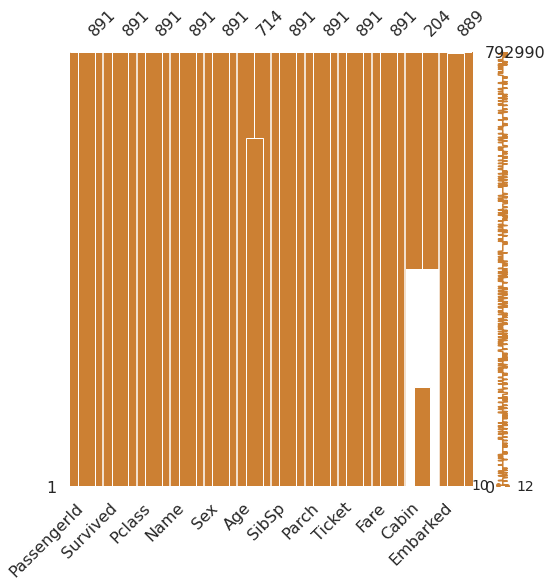

In [4]:
# Check the null values
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col,100*df_test[col].isnull().sum() / df_test[col].shape[0])
    print(msg)

# Check null values with matrix
msno.matrix(df=df_train.iloc[:,:], figsize=(8,8), color=(0.8,0.5,0.2))

# Check null values with bar
msno.bar(df=df_train.iloc[:,:], figsize=(8,8), color=(0.8,0.5,0.2))

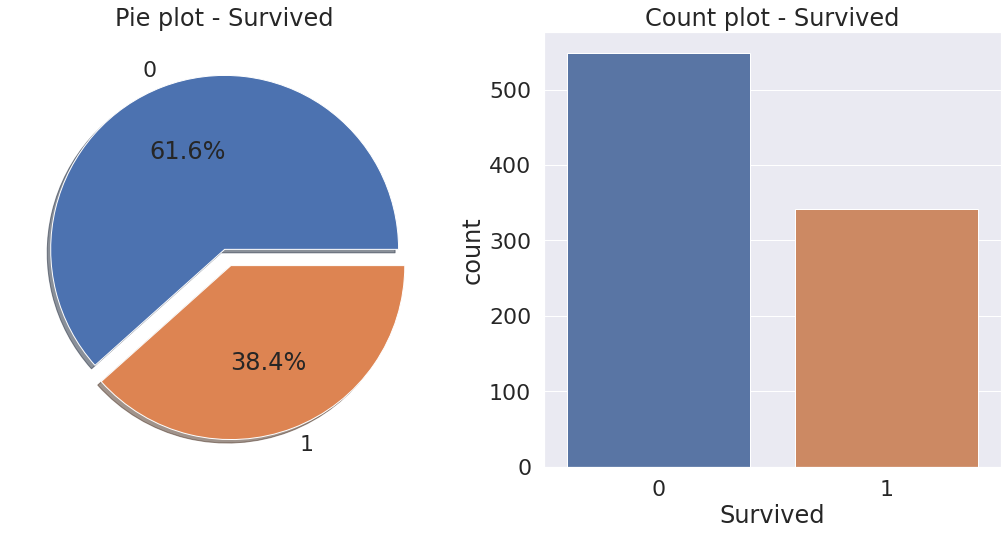

In [5]:
# Check label with pie char and bar chart
f, ax = plt.subplots(1,2,figsize=(18,8))

df_train['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')
plt.show()

        Survived
Pclass          
1            216
2            184
3            491
        Survived
Pclass          
1            136
2             87
3            119
        Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363


<AxesSubplot:xlabel='Pclass'>

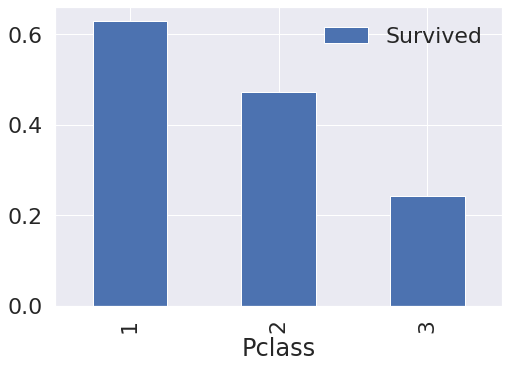

In [6]:
# Check relationship between Pclass and Surviced
print(df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).count())
print(df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).sum())
print(df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).mean())

# relationship with crosstab
pd.crosstab(df_train['Pclass'], df_train['Survived'],margins=True).style.background_gradient(cmap='summer')

# relation ship with bar chart
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).mean().plot.bar()

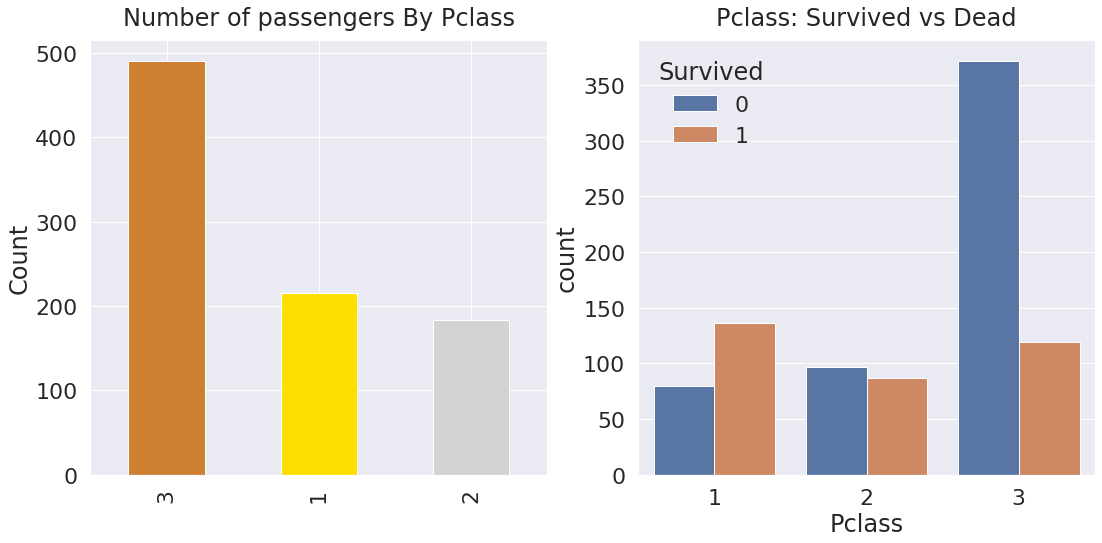

In [7]:
# Number of passengers and Pclass by label
y_position = 1.02
f, ax = plt.subplots(1,2,figsize=(18,8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number of passengers By Pclass',y=y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y= y_position)
plt.show()

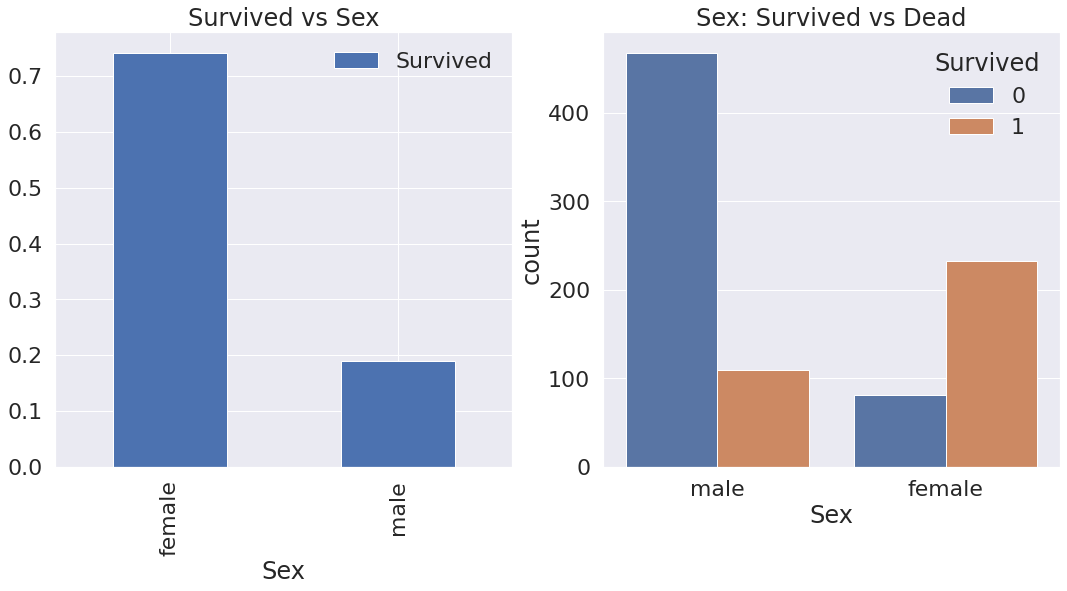

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [8]:
# Sex by label 
f, ax = plt.subplots(1,2,figsize=(18,8))
df_train[['Sex','Survived']].groupby(['Sex'],as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

# Crosstabl between sex and label
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True)

Text(0.5, 0.98, 'Survival rate by class and gender')

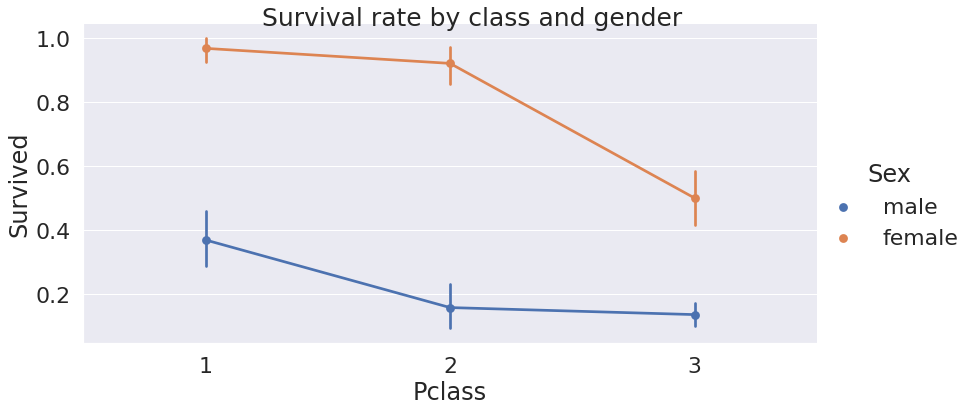

In [9]:
# Survival rate by class and gender
f = sns.factorplot('Pclass','Survived',hue='Sex',data=df_train, size=6, aspect=2)
f.fig.suptitle('Survival rate by class and gender', fontsize= 25)

Text(0.5, 0.98, 'Survival rate by class and gender')

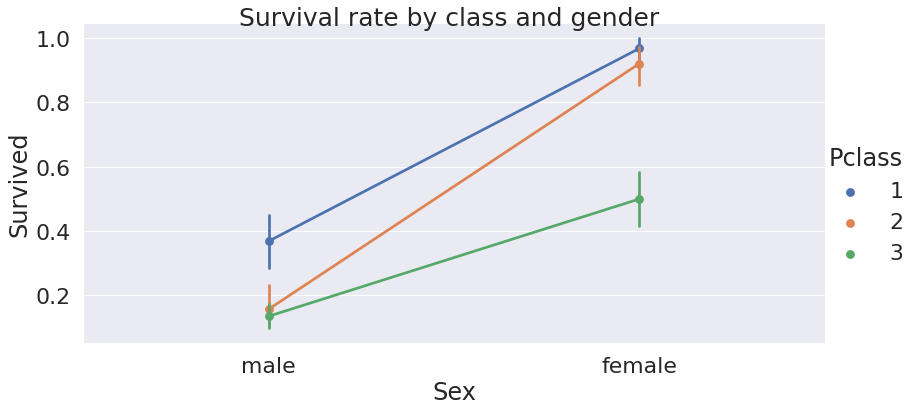

In [10]:
# Survival rate by class and gender
f = sns.factorplot(x='Sex', y='Survived', hue='Pclass', data=df_train, saturation=.5, size=6, aspect=2)
f.fig.suptitle('Survival rate by class and gender', fontsize= 25)

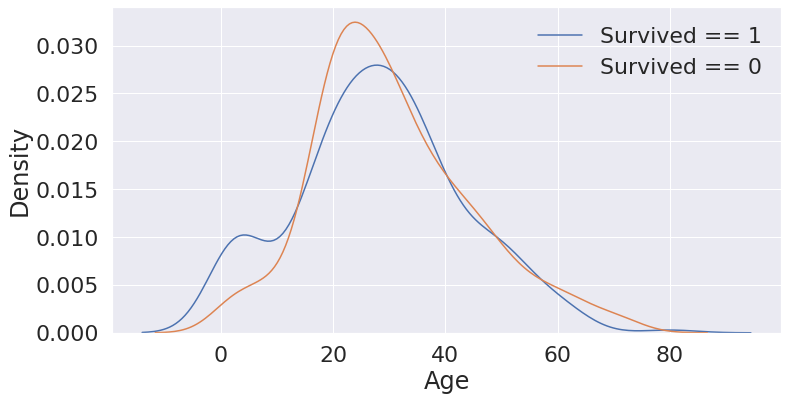

In [11]:
# Survival rate by class and gender
fig, ax = plt.subplots(1,1,figsize=(12,6))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1','Survived == 0'])
plt.show()

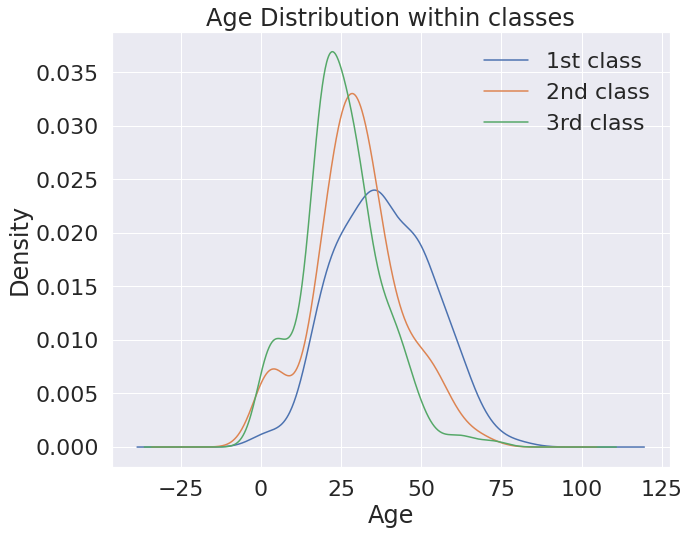

In [12]:
# Age Distribution within classes
plt.figure(figsize=(10,8))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st class','2nd class','3rd class'])

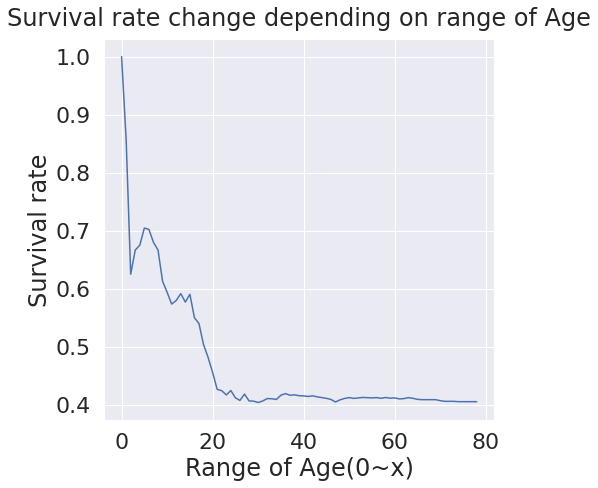

In [13]:
# Survival rate change depending on range of Age
change_age_range_survival_ratio = []

for i in range(1, 80):
    change_age_range_survival_ratio.append(df_train[df_train['Age'] <i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))
    
plt.figure(figsize=(7,7))
plt.plot(change_age_range_survival_ratio)
plt.title('Survival rate change depending on range of Age',y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

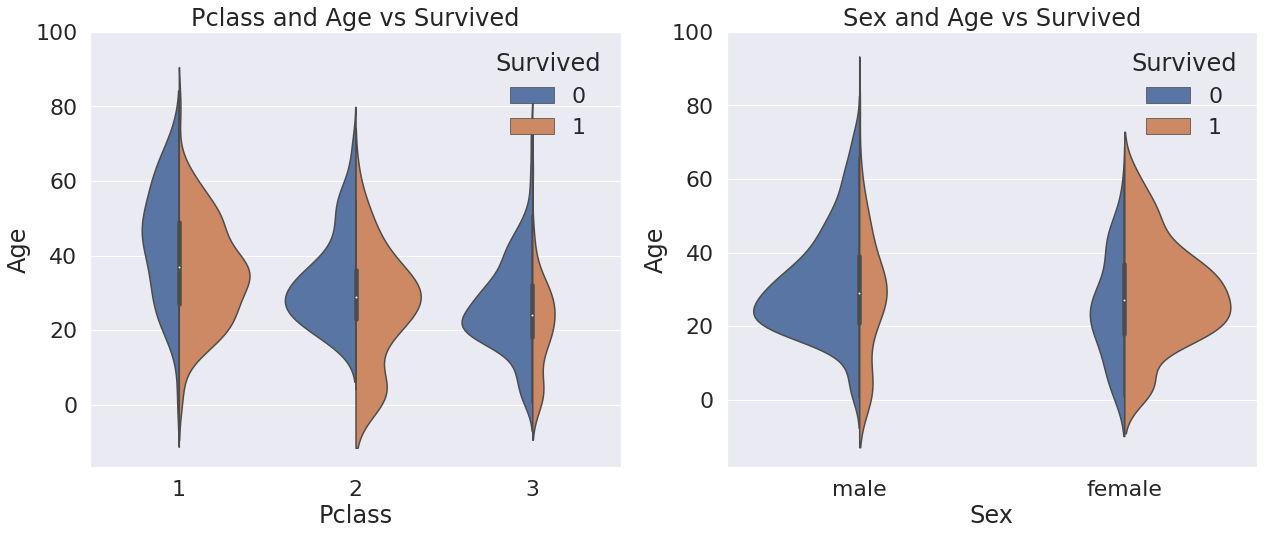

In [14]:
# Survival rate by class and age using violinplot
f, ax = plt.subplots(1,2,figsize=(18,8))
sns.violinplot('Pclass','Age',hue='Survived',data=df_train, scale='count',split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,20))

sns.violinplot('Sex','Age',hue="Survived", data=df_train, scale='count',split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,20))

plt.subplots_adjust(left=0.1,right=1)
plt.show()

<AxesSubplot:xlabel='Embarked'>

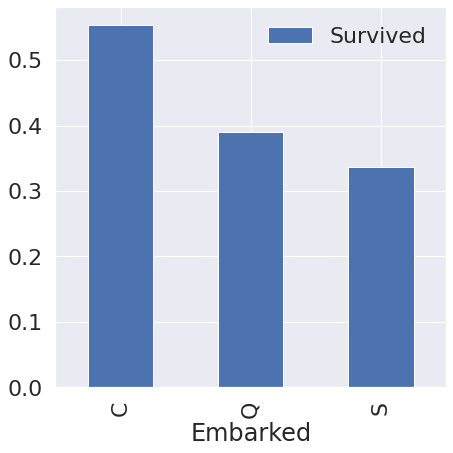

In [15]:
# Survival rate by Embarked port
f,ax = plt.subplots(1,1,figsize=(7,7))
df_train[['Embarked','Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

<function matplotlib.pyplot.show(close=None, block=None)>

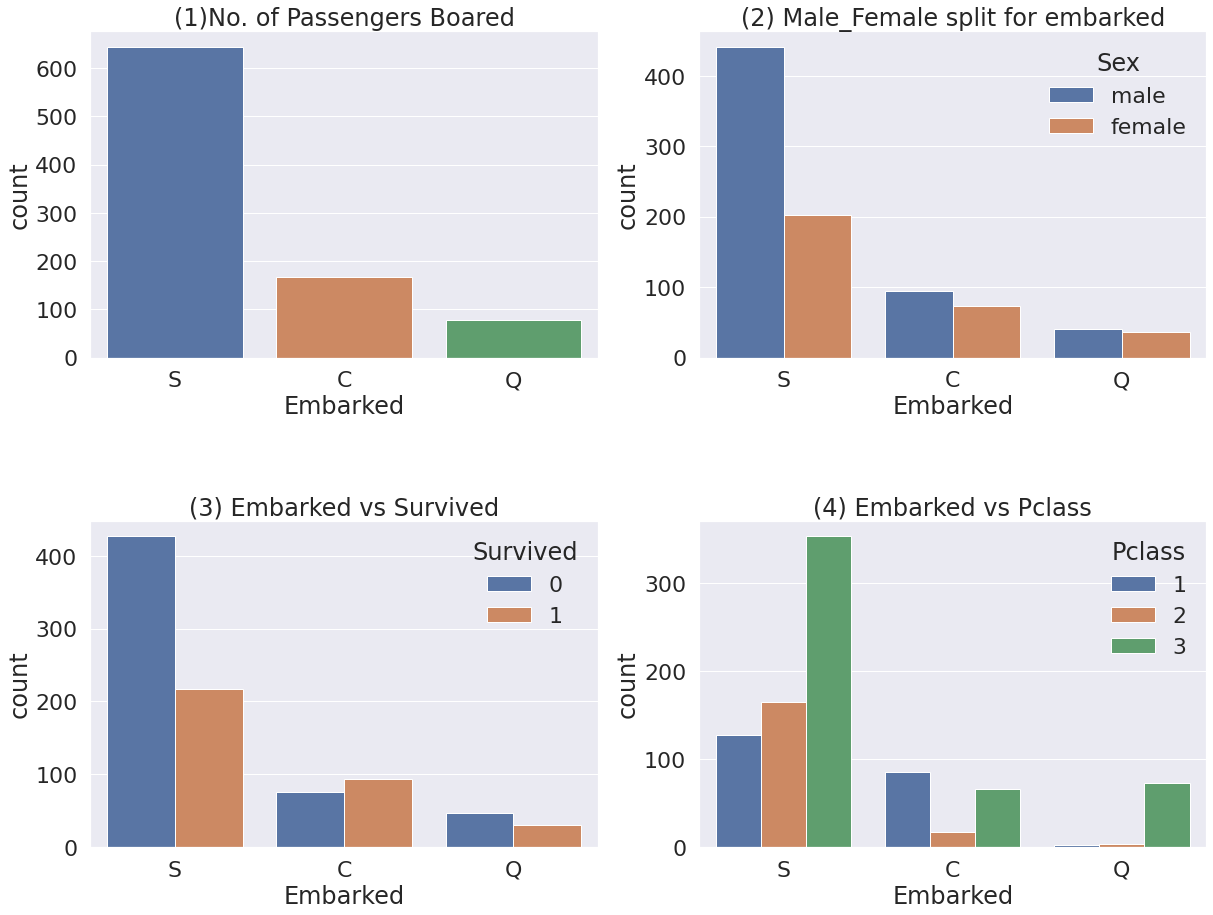

In [16]:
# EDA with Embarked columns
f,ax = plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1)No. of Passengers Boared')

sns.countplot('Embarked',hue='Sex',data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male_Female split for embarked')

sns.countplot('Embarked',hue='Survived',data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')

sns.countplot('Embarked',hue='Pclass',data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show

Maximum size of Family:  11
Minimun size of Family:  1


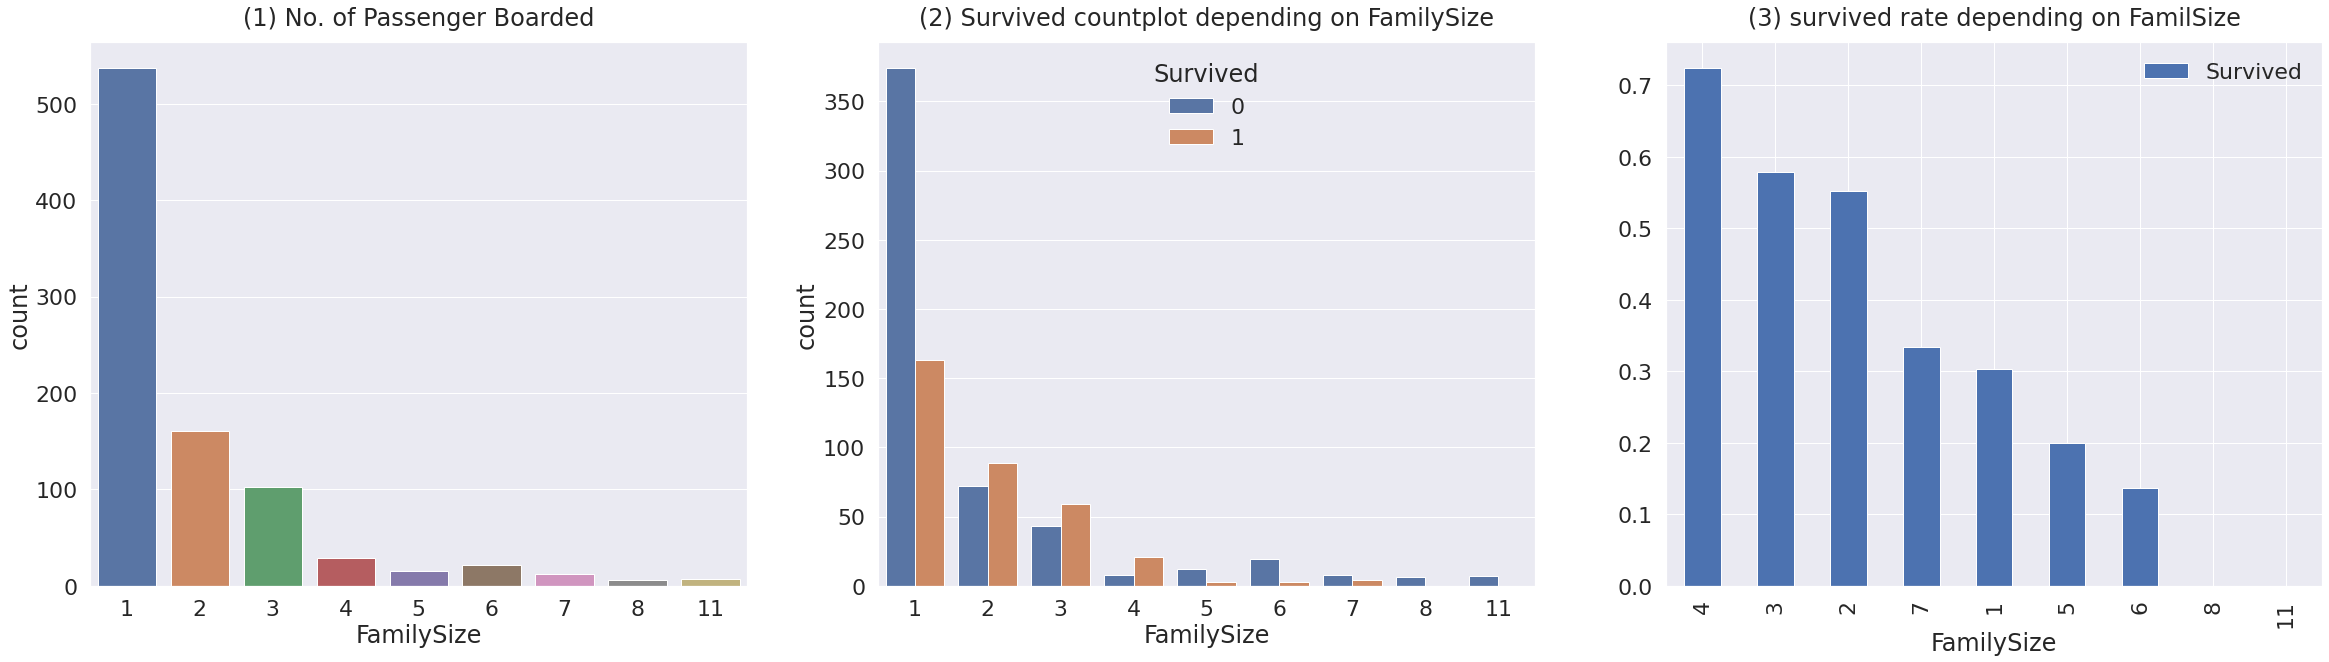

In [17]:
# EDA with SibSp and Parch columns

# Make FamilySize columns
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] +  1
df_test['FamliSize'] = df_test['SibSp'] + df_test['Parch'] + 1

print('Maximum size of Family: ', df_train['FamilySize'].max())
print('Minimun size of Family: ', df_train['FamilySize'].min())

f, ax = plt.subplots(1,3,figsize=(40,10))
sns.countplot('FamilySize',data=df_train, ax=ax[0])
ax[0].set_title('(1) No. of Passenger Boarded', y=1.02)

sns.countplot('FamilySize',hue='Survived' ,data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize', y=1.02)

df_train[['FamilySize','Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived',ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) survived rate depending on FamilSize',y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# 이 형태가 제일 예쁜것 같다.

# Preprocessing

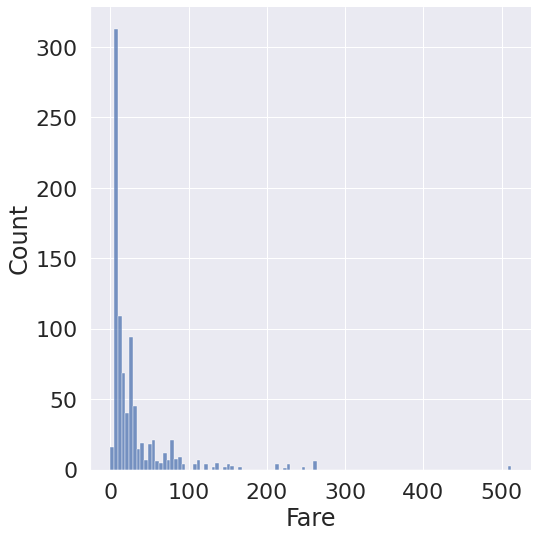

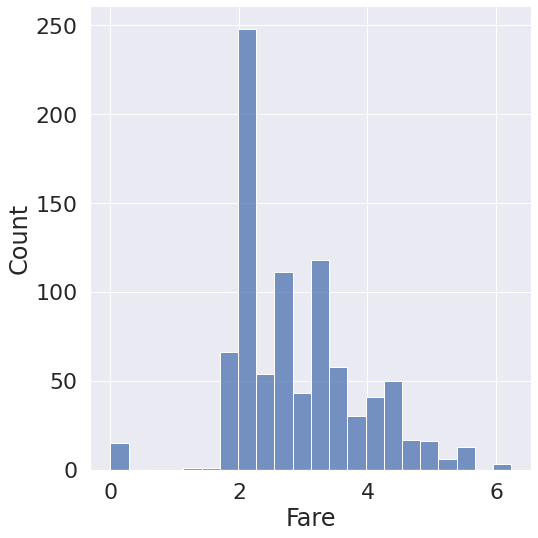

In [18]:
# preprocess Fare
df_train['Fare'].head()

# Before applying the log function
p = sns.displot(df_train['Fare'], height=8, aspect=1,kind='hist')

# apply np.log
df_train['Fare'] = df_train['Fare'].map(lambda i : np.log(i) if i > 0 else 0)

# After applying the log function
p = sns.displot(df_train['Fare'], height=8, aspect=1,kind='hist')

In [19]:
# Ticket preprocessing
df_train['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

         PassengerId  Survived    Pclass        Age     SibSp     Parch  \
Initial                                                                   
Master    414.975000  0.575000  2.625000   4.574167  2.300000  1.375000   
Miss      411.741935  0.704301  2.284946  21.860000  0.698925  0.537634   
Mr        455.880907  0.162571  2.381853  32.739609  0.293006  0.151229   
Mrs       456.393701  0.795276  1.984252  35.981818  0.692913  0.818898   
Other     564.444444  0.111111  1.666667  45.888889  0.111111  0.111111   

             Fare  FamilySize  
Initial                        
Master   3.340710    4.675000  
Miss     3.123713    2.236559  
Mr       2.651507    1.444234  
Mrs      3.443751    2.511811  
Other    2.641605    1.222222  


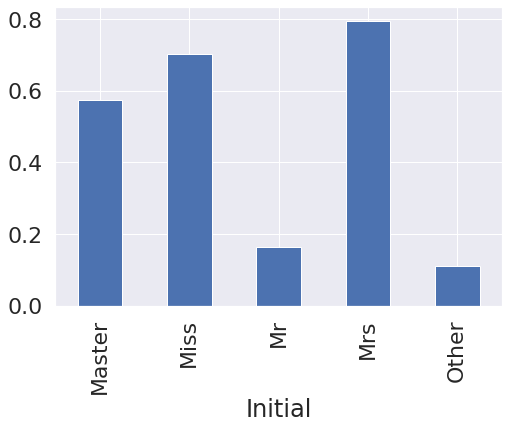

In [20]:
# preprocessing Name

# check null value
df_train['Name'].isnull().sum()

# Parse the Name
df_train['Initial']=df_train['Name'].str.extract('([A-Za-z]+)\.')
df_test['Initial']=df_test['Name'].str.extract('([A-Za-z]+)\.')

# check the crosstab
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r')

# Change each initials with broader a Initial
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],
                           ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Mr'], inplace=True)

df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],
                           ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Mr'], inplace=True)


# correlation with other columns
print(df_train.groupby('Initial').mean())

# bar plot of Initial and Survived
df_train.groupby('Initial')['Survived'].mean().plot.bar()

# Initial mapping to number
df_train['Initial'] = df_train['Initial'].map({'Master':0,'Miss':1,'Mr':2,'Mrs':3,'Other':4})
df_test['Initial'] = df_test['Initial'].map({'Master':0,'Miss':1,'Mr':2,'Mrs':3,'Other':4})

In [21]:
# preprocessing Age

# Fill NaN value based on each person's Initial
df_train.loc[(df_train['Age'].isnull())&(df_train['Initial'] == 'Mr'),'Age'] = 33
df_train.loc[(df_train['Age'].isnull())&(df_train['Initial'] == 'Mrs'),'Age'] = 37
df_train.loc[(df_train['Age'].isnull())&(df_train['Initial'] == 'Master'),'Age'] = 5
df_train.loc[(df_train['Age'].isnull())&(df_train['Initial'] == 'Miss'),'Age'] = 22
df_train.loc[(df_train['Age'].isnull())&(df_train['Initial'] == 'Other'),'Age'] = 45

df_test.loc[(df_test['Age'].isnull())&(df_test['Initial'] == 'Mr'),'Age'] = 33
df_test.loc[(df_test['Age'].isnull())&(df_test['Initial'] == 'Mrs'),'Age'] = 37
df_test.loc[(df_test['Age'].isnull())&(df_test['Initial'] == 'Master'),'Age'] = 5
df_test.loc[(df_test['Age'].isnull())&(df_test['Initial'] == 'Miss'),'Age'] = 22
df_test.loc[(df_test['Age'].isnull())&(df_test['Initial'] == 'Other'),'Age'] = 45

def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7
    
df_train['Age_cat'] = df_train['Age'].apply(category_age)
df_test['Age_cat'] = df_test['Age'].apply(category_age)

df_train.drop(['Age'],axis=1,inplace=True)
df_test.drop(['Age'],axis=1,inplace=True)

In [22]:
# preprocessing Embarked

# fill Embarked with S value
df_train['Embarked'].fillna('S',inplace=True)
df_train['Embarked'].isnull().sum()

# mapping Embarked to number
df_train['Embarked'] = df_train['Embarked'].map({'C':0,'Q':1,'S':2})
df_test['Embarked'] = df_test['Embarked'].map({'C':0,'Q':1,'S':2})

In [23]:
# Sex preprocessing

# mapping Sex to number
df_train['Sex'] = df_train['Sex'].map({'female':0,'male':1})
df_test['Sex'] = df_test['Sex'].map({'female':0,'male':1})

In [24]:
# heat-map and correlation of each columns
heatmap_data = df_train[['Survived','Pclass','Sex','Fare','Embarked','FamilySize','Initial','Age_cat']]
heatmap_data.corr()

,Survived,Pclass,Sex,Fare,Embarked,FamilySize,Initial,Age_cat
Survived,1.000000,-0.338481,-0.543351,0.331805,-0.167675,0.016639,-0.085529,-0.114111
Pclass,-0.338481,1.000000,0.131900,-0.670489,0.162098,0.065997,-0.133054,-0.050948
Sex,-0.543351,0.131900,1.000000,-0.264751,0.108262,-0.200988,0.051687,0.094497
Fare,0.331805,-0.670489,-0.264751,1.000000,-0.199932,0.389193,-0.019889,-0.073517
Embarked,-0.167675,0.162098,0.108262,-0.199932,1.000000,0.066516,0.026550,-0.141524
FamilySize,0.016639,0.065997,-0.200988,0.389193,0.066516,1.000000,-0.204574,-0.186000
Initial,-0.085529,-0.133054,0.051687,-0.019889,0.026550,-0.204574,1.000000,0.249782
Age_cat,-0.114111,-0.050948,0.094497,-0.073517,-0.141524,-0.186000,0.249782,1.000000


In [25]:
# One-hot encoding Initial columns
df_train = pd.get_dummies(df_train,columns=['Initial'],prefix='Initial')
df_test = pd.get_dummies(df_test,columns=['Initial'],prefix='Initial')

In [26]:
# Drop other columns
df_train.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin'],axis=1,inplace=True)
df_test.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin'],axis=1,inplace=True)

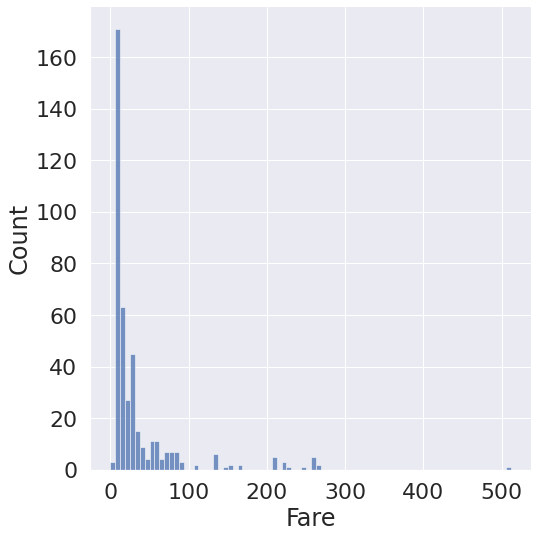

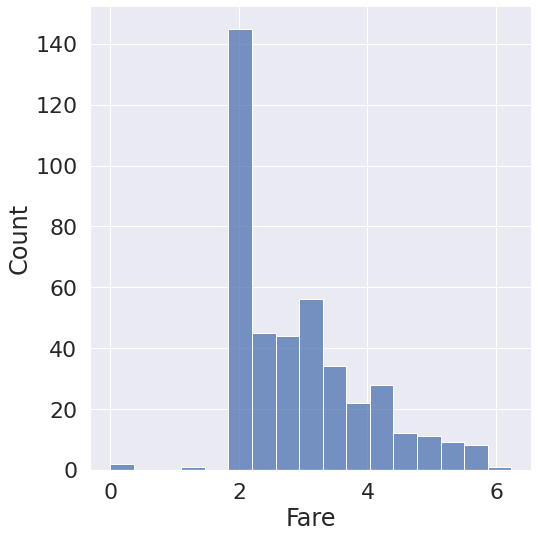

In [27]:
# Fill Fare columns in df_test
df_test['Fare'].mean()
df_test['Fare'] = df_test['Fare'].fillna(round(df_test['Fare'].mean(),4))
df_test['Fare'].isnull().sum()

# Before applying the log function
p = sns.displot(df_test['Fare'], height=8, aspect=1,kind='hist')

# apply np.log
df_test['Fare'] = df_test['Fare'].map(lambda i : np.log(i) if i > 0 else 0)

# After applying the log function
p = sns.displot(df_test['Fare'], height=8, aspect=1,kind='hist')

# Machine learning

In [28]:
# import library
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [29]:
X = df_train.drop('Survived', axis=1).values
y = df_train['Survived'].values

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

In [31]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "GradientBoostingClassifier" : GradientBoostingClassifier()
}

In [32]:
from sklearn.model_selection import cross_val_score

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 84.0 % accuracy score
Classifiers:  SVC Has a training score of 83.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 80.0 % accuracy score
Classifiers:  RandomForestClassifier Has a training score of 83.0 % accuracy score
Classifiers:  GradientBoostingClassifier Has a training score of 84.0 % accuracy score


In [33]:
# Grid Search
from sklearn.model_selection import GridSearchCV

# Logistic Regression
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
log_reg = grid_log_reg.best_estimator_

In [34]:
# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_

In [35]:
# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_

In [36]:
# RandomForess Classifier
RF_params = {'n_estimators':[10,100],'max_depth':list(range(3,6,1)), 'min_samples_leaf':list(range(4,8,1))}
grid_RF = GridSearchCV(RandomForestClassifier(), RF_params)
grid_RF.fit(X_train, y_train)

# RF best estimator
RF_clf = grid_RF.best_estimator_

In [37]:
# Gradient Boosting Classifier
GB_params = {'learning_rate':[0.01,0.1], 'n_estimators':[10,100]}
grid_GB = GridSearchCV(GradientBoostingClassifier(), GB_params)
grid_GB.fit(X_train, y_train)

# GB best estimator
GB_clf = grid_GB.best_estimator_

In [38]:
# Overfitting Case

log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

RF_score = cross_val_score(RF_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(RF_score.mean() * 100, 2).astype(str) + '%')

GB_score = cross_val_score(GB_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(GB_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  83.56%
Support Vector Classifier Cross Validation Score 83.42%
DecisionTree Classifier Cross Validation Score 82.44%
DecisionTree Classifier Cross Validation Score 84.12%
DecisionTree Classifier Cross Validation Score 83.98%


In [39]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(log_reg, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(.1,1.0,10))

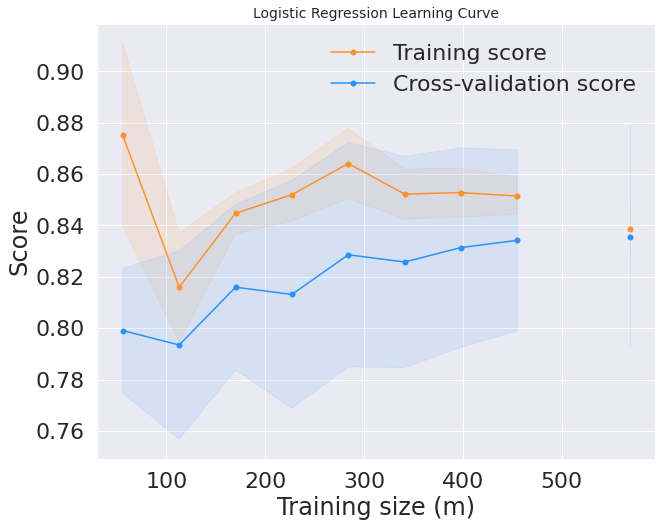

In [40]:
f, ax = plt.subplots(1,1,figsize=(10,8))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
ax.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
ax.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
ax.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
ax.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
ax.set_title("Logistic Regression Learning Curve", fontsize=14)
ax.set_xlabel('Training size (m)')
ax.set_ylabel('Score')
ax.grid(True)
ax.legend(loc="best")

## RandomizedSearchCV

In [41]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import RandomizedSearchCV

In [42]:
max_depth = np.random.randint(2, 20, 10)
max_features = np.random.uniform(0.3, 1.0, 10)

estimators = [DecisionTreeClassifier(),
RandomForestClassifier(),
GradientBoostingClassifier()]
estimators

[DecisionTreeClassifier(),
 RandomForestClassifier(),
 GradientBoostingClassifier()]

In [43]:
param_distributions = {"max_depth": max_depth, 
                       "max_features": max_features}

results = []
for estimator in estimators:
    result = []
    if estimator.__class__.__name__ != 'DecisionTreeClassifier':
        param_distributions["n_estimators"] = np.random.randint(100, 200, 10)
        
    clf = RandomizedSearchCV(estimator, 
                       param_distributions, 
                       n_iter=100,
                       scoring="accuracy",
                       n_jobs=-1,
                       cv=5, 
                       verbose=0
                      )

    clf.fit(X_train,y_train)
    result.append(estimator.__class__.__name__)
    result.append(clf.best_params_)
    result.append(clf.best_score_)
    result.append(clf.score(X_test, y_test))
    result.append(clf.cv_results_)
    results.append(result)

In [44]:
df = pd.DataFrame(results, 
             columns=["estimator", "best_params", "train_score", "test_score", "cv_result"])


In [45]:
df

,estimator,best_params,train_score,test_score,cv_result
0,DecisionTreeClassifier,"{'max_features': 0.8022140754354179, 'max_dept...",0.837033,0.826816,"{'mean_fit_time': [0.0020895957946777343, 0.00..."
1,RandomForestClassifier,"{'n_estimators': 134, 'max_features': 0.769260...",0.855284,0.787709,"{'mean_fit_time': [0.41039514541625977, 0.4437..."
2,GradientBoostingClassifier,"{'n_estimators': 144, 'max_features': 0.862216...",0.848281,0.798883,"{'mean_fit_time': [0.7242424964904786, 1.98551..."


In [46]:
df.iloc[2]['best_params']

{'n_estimators': 144, 'max_features': 0.8622162022301774, 'max_depth': 4}

In [47]:
model = GradientBoostingClassifier(n_estimators=127, max_features=0.5353163347408417,max_depth=5)
model.fit(X,y)

GradientBoostingClassifier(max_depth=5, max_features=0.5353163347408417,
                           n_estimators=127)

In [48]:
result = model.predict(df_test.values)

In [49]:
submission = pd.read_csv('../input/titanic/gender_submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [50]:
prediction = model.predict(X_test)

In [51]:
submission['Survived'] = result

In [52]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [53]:
submission.to_csv('./my_first_submission.csv',index=False)